In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays

In [10]:
n = 50
p = 0.3
eta = 0.3

rng = Random.default_rng();
comp_graph = gen_graph_mun(n, p, eta);
B = magnetic_incidence(comp_graph; oriented=true);
L = B*B';

### Leverage score approximation with monte carlo

relative error: 0.010832156972811499

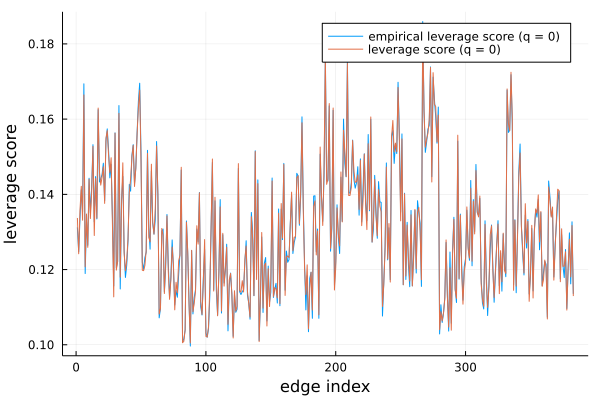

In [16]:
t= 50000;
q = 0;
emp_lev = emp_leverage_score(rng, comp_graph, q,  t);
lev = leverage_score(B, q);

print("relative error: ",norm(emp_lev - lev)/norm(lev))
plot(emp_lev,xlabel = "edge index",ylabel = "leverage score",labels="empirical leverage score (q = 0)");
plot!(lev,labels="leverage score (q = 0)")

### Condition number of preconditioned system vs number of CRSFs

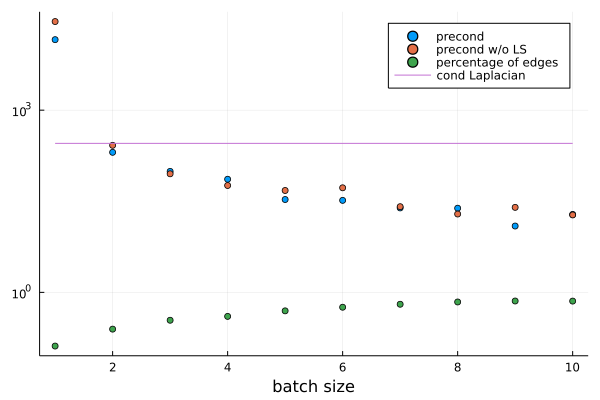

In [11]:
n = nv(comp_graph);
m = ne(comp_graph);

q = 0;
lev = leverage_score(B, q);

n_tot = 10;
cnd_number = zeros(n_tot,1);
cnd_number_no_lev = zeros(n_tot,1);

percent_edges = zeros(n_tot,1);
for i=1:n_tot
    avg_L = average_sparsifier(rng,comp_graph,lev,true,q,i);
    avg_L_no_lev = average_sparsifier(rng,comp_graph,lev,false,q,i);
    cnd_number[i] = cond(inv(avg_L)*L);
    cnd_number_no_lev[i] = cond(inv(avg_L_no_lev)*L);
    percent_edges[i] = nb_of_edges(avg_L)/m;
end
scatter(1:n_tot,cnd_number, yaxis=:log,xlabel = "batch size",labels = "precond")
scatter!(1:n_tot,cnd_number_no_lev, yaxis=:log,xlabel = "batch size",labels = "precond w/o LS")
scatter!(1:n_tot,percent_edges,labels = "percentage of edges")
plot!(1:n_tot,cond(L)*ones(n_tot,1),labels = "cond Laplacian")



### eigenvalues approximation

percentage of number of edges : 0.3394255874673629

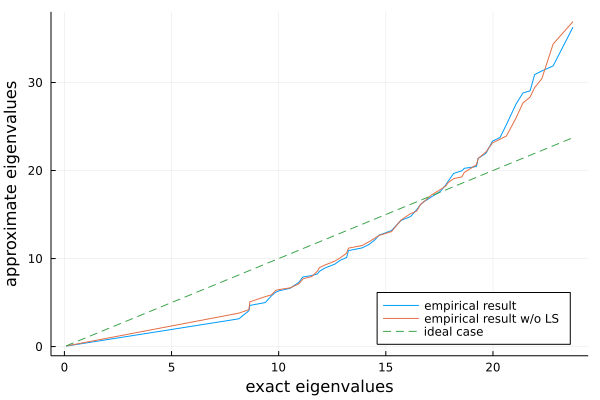

In [12]:
t = 3;
q = 0;
n = nv(comp_graph);
m = ne(comp_graph);

lev = leverage_score(B, q);

avg_L = average_sparsifier(rng,comp_graph,lev,true,q,t);
avg_L_no_lev = average_sparsifier(rng,comp_graph,lev,false,q,t);

percent = ((nnz(sparse(avg_L))-n)/2)/m;
print("percentage of number of edges : ", percent )
plot(real(eigvals(L)), real(eigvals(avg_L)),xlabel = "exact eigenvalues",ylabel = "approximate eigenvalues", labels = "empirical result")
plot!(real(eigvals(L)), real(eigvals(avg_L_no_lev)), labels = "empirical result w/o LS")

plot!(real(eigvals(L)), real(eigvals(L)),linestyle= :dash, labels = "ideal case",legend=:bottomright)

### Ranking
#### exact sync-rank

nb of edges: 383.0

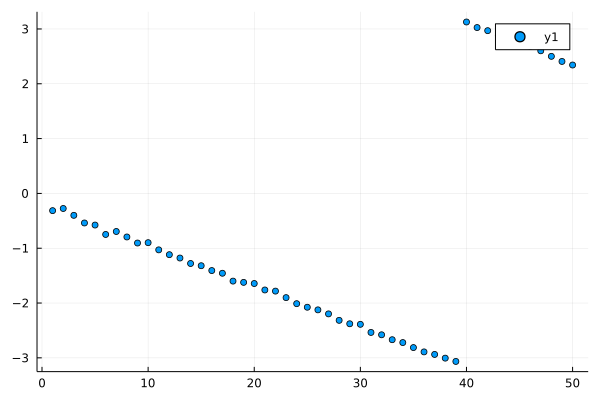

In [13]:
B = magnetic_incidence(comp_graph; oriented=true);
L = B*B';

lam,v = eigs(L, nev=1, which=:SM);
print("nb of edges: ", nb_of_edges(L))

scatter(angular_score(v))

nb of edges: 138.0 over 383.0

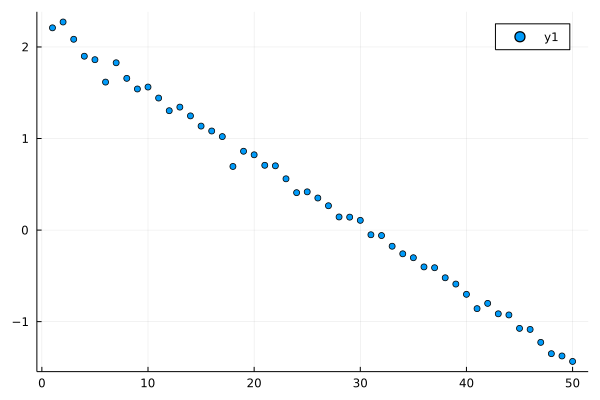

In [14]:
t = 3;
q = 0;
lev = leverage_score(B, q);

avg_L = average_sparsifier(rng,comp_graph,lev,true,q,t);
print("nb of edges: ", nb_of_edges(avg_L), " over ", nb_of_edges(L))

lam,v = eigs(avg_L, nev=1, which=:SM);
scatter(angular_score(v))

nb of edges: 126.0 over 383.0

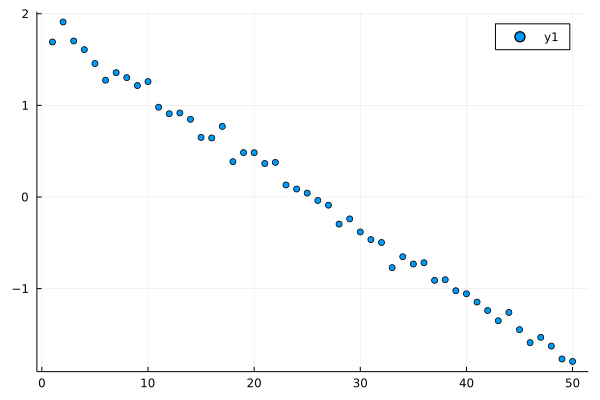

In [15]:
t = 3;
q = 0;
lev = leverage_score(B, q);
# without LS
avg_L = average_sparsifier(rng,comp_graph,lev,false,q,t);
print("nb of edges: ", nb_of_edges(avg_L), " over ", nb_of_edges(L))
lam,v = eigs(avg_L, nev=1, which=:SM);
scatter(angular_score(v))